# Setup

In [50]:
import numpy as np
import pandas
#import pandas as pd
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare data for a DataFrame

In [15]:
'''
The data is given as a multi-line string 
and describes alcohol and tobacco consumption in UK regions.
'''

data_str = '''Region\tAlcohol\tTobacco
North\t6.47\t4.03
Yorkshire\t6.13\t3.76
Northeast\t6.19\t3.77
East Midlands\t4.89\t3.34
West Midlands\t5.63\t3.47
East Anglia\t4.52\t2.92
Southeast\t5.89\t3.20
Southwest\t4.79\t2.71
Wales\t5.27\t3.53
Scotland\t6.08\t4.51
Northern Ireland\t4.02\t4.56'''

data_str

'Region\tAlcohol\tTobacco\nNorth\t6.47\t4.03\nYorkshire\t6.13\t3.76\nNortheast\t6.19\t3.77\nEast Midlands\t4.89\t3.34\nWest Midlands\t5.63\t3.47\nEast Anglia\t4.52\t2.92\nSoutheast\t5.89\t3.20\nSouthwest\t4.79\t2.71\nWales\t5.27\t3.53\nScotland\t6.08\t4.51\nNorthern Ireland\t4.02\t4.56'

In [16]:
# split data into a list of strings
d = data_str.split('\n')

d

['Region\tAlcohol\tTobacco',
 'North\t6.47\t4.03',
 'Yorkshire\t6.13\t3.76',
 'Northeast\t6.19\t3.77',
 'East Midlands\t4.89\t3.34',
 'West Midlands\t5.63\t3.47',
 'East Anglia\t4.52\t2.92',
 'Southeast\t5.89\t3.20',
 'Southwest\t4.79\t2.71',
 'Wales\t5.27\t3.53',
 'Scotland\t6.08\t4.51',
 'Northern Ireland\t4.02\t4.56']

In [17]:
#Next, each row can be split by 'tab' into list
d = [i.split('\t') for i in d]

d

[['Region', 'Alcohol', 'Tobacco'],
 ['North', '6.47', '4.03'],
 ['Yorkshire', '6.13', '3.76'],
 ['Northeast', '6.19', '3.77'],
 ['East Midlands', '4.89', '3.34'],
 ['West Midlands', '5.63', '3.47'],
 ['East Anglia', '4.52', '2.92'],
 ['Southeast', '5.89', '3.20'],
 ['Southwest', '4.79', '2.71'],
 ['Wales', '5.27', '3.53'],
 ['Scotland', '6.08', '4.51'],
 ['Northern Ireland', '4.02', '4.56']]

In [18]:
d[1][1]

'6.47'

In [19]:
'''
This list of lists is ready for upload into a DataFrame.
But first, we change the type from numerical strings to floats.
'''

# Loop through each sublist in the list
for i in range(len(d)):
    # Loop through each item in the sublist
    for j in range(len(d[0])):
        try:
            # Try converting the item to float
            d[i][j] = float(d[i][j])
        except:
            # If conversion fails (e.g., for non-numeric strings), do nothing and continue
            pass

# Print the updated list

d

[['Region', 'Alcohol', 'Tobacco'],
 ['North', 6.47, 4.03],
 ['Yorkshire', 6.13, 3.76],
 ['Northeast', 6.19, 3.77],
 ['East Midlands', 4.89, 3.34],
 ['West Midlands', 5.63, 3.47],
 ['East Anglia', 4.52, 2.92],
 ['Southeast', 5.89, 3.2],
 ['Southwest', 4.79, 2.71],
 ['Wales', 5.27, 3.53],
 ['Scotland', 6.08, 4.51],
 ['Northern Ireland', 4.02, 4.56]]

# DataFrame

In [21]:
'''And finally create the DataFrame'''

df = DataFrame(d[1:], columns=d[0])

df

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East Midlands,4.89,3.34
4,West Midlands,5.63,3.47
5,East Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


# Scatter graph

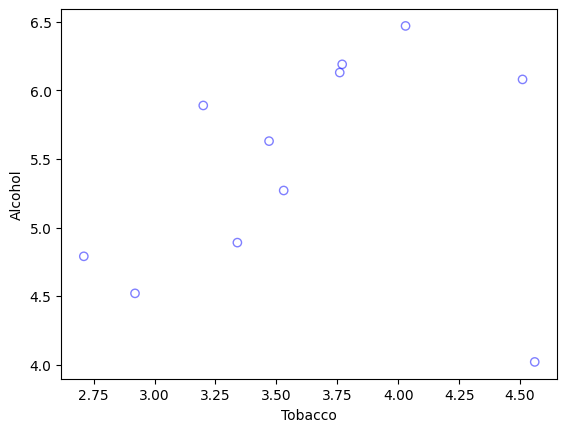

In [22]:
plt.scatter( df.Tobacco, df.Alcohol,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.5 )
plt.xlabel('Tobacco')
plt.ylabel('Alcohol')
None #Qn No plot() or show(). How is the graph displaying?

This scatter plot shows that one observation falls far from the rest of data or "cloud" of points. Such points are called outliers and they can have a strong influence on the regression line.

First, linear regression will be run without outliers. Since it happened to be the last row in the Dataframe it is very easy to exclude.

In [23]:
# For the intercept coefficient, we add new column of 1
df['Eins'] = np.ones((len(df), ))

df

,Region,Alcohol,Tobacco,Eins
0,North,6.47,4.03,1.0
1,Yorkshire,6.13,3.76,1.0
2,Northeast,6.19,3.77,1.0
3,East Midlands,4.89,3.34,1.0
4,West Midlands,5.63,3.47,1.0
5,East Anglia,4.52,2.92,1.0
6,Southeast,5.89,3.20,1.0
7,Southwest,4.79,2.71,1.0
8,Wales,5.27,3.53,1.0
9,Scotland,6.08,4.51,1.0


In [24]:
# Define X and Y variables for the regression.
Y = df.Alcohol[:-1] # Excluding last value since data point is an outlier
X = df[['Tobacco','Eins']][:-1] # Excluding last value since data point is an outlier

In [25]:
'''This will run the fit, here we are going to use the Ordinary Least Squares (OLS) algorithm'''
import statsmodels.api as sm

# This will create an instance of Linear Regression
result_no_outlier = sm.OLS( Y, X).fit()

# OLS is a method for estimating the unknown parameters in a linear regression model 

'''(Y, X): This part of the code specifies the dependent variable Y and the independent variables X for the regression model. In this case, Y represents the target variable (response variable), which is the 'Alcohol' column in the DataFrame df excluding the last element (df.Alcohol[:-1]). X represents the predictor variables, which include the 'Tobacco' column and the 'Eins' column (a column of ones) in the DataFrame df excluding the last element '''

'''fit(): This method is called on the OLS object returned by sm.OLS(Y, X). It fits the linear regression model to the data. Specifically, it estimates the coefficients of the regression model using the provided data (Y and X) and returns a RegressionResults object containing information about the fitted model, such as the coefficients, standard errors, t-values, p-values, and other statistics.'''

'''So, sm.OLS(Y, X).fit() constructs an ordinary least squares regression model using the provided dependent and independent variables (Y and X) and then fits the model to the data, returning a RegressionResults object that contains information about the fitted model.'''

In [26]:
# To get the summary of the regression
result_no_outlier.summary()

c:\Users\Aiga\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Tue, 26 Mar 2024   Prob (F-statistic):            0.00723
Time:                        13:25:05   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tobacco        1.0059      0.281      3.576      0.007       0.357       1.655
Eins           2.0412      1.001      2.038      0.076      -0.268       4.350
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.904
Skew:                          -0.014   Prob(JB):                        0.636
Kurtosis:                       1.527   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
result_no_outlier.params

'''.params
This attribute of the results object contains the estimated coefficients of the predictors in the regression model.'''

Tobacco    1.005896
Eins       2.041223
dtype: float64

In [28]:
'''Let's assign these parameters to variables slope and intercept.'''

slope, intercept = result_no_outlier.params

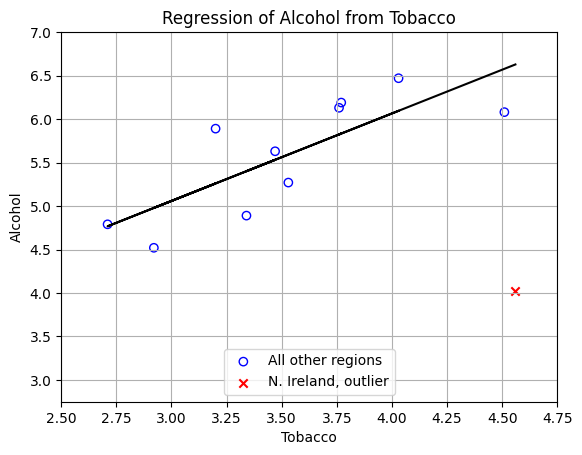

In [29]:
'''Let's plot the line over the scatter plot'''

plt.scatter(df.Tobacco[:-1], df.Alcohol[:-1],
         marker='o', facecolors='none', edgecolors='b',
         label='All other regions')
 
plt.scatter(df.Tobacco[-1:], df.Alcohol[-1:],
         marker='x', color='r',
         label='N. Ireland, outlier')
 
plt.plot( df.Tobacco, intercept + slope*df.Tobacco, 'k' )
plt.xlabel('Tobacco') ; 
plt.axis([2.5,4.75,2.75,7.0])
plt.ylabel('Alcohol')
plt.title('Regression of Alcohol from Tobacco') ;
plt.grid() ;
plt.legend(loc='lower center')
plt.show()

# Outliers and leverage

Let's get back to our regression example and run another fit, this time including the outlier.

In [34]:
X_o = df[['Tobacco','Eins']]
Y_o = df.Alcohol

result_with_outlier = sm.OLS( Y_o, X_o ).fit()

In [38]:
result_no_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Tue, 26 Mar 2024   Prob (F-statistic):            0.00723
Time:                        14:49:30   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tobacco        1.0059      0.281      3.576      0.007       0.357       1.655
Eins           2.0412      1.001      2.038      0.076      -0.268       4.350
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.904
Skew:                          -0.014   Prob(JB):                        0.636
Kurtosis:                       1.527   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
slope_o, intercept_o = result_with_outlier.params

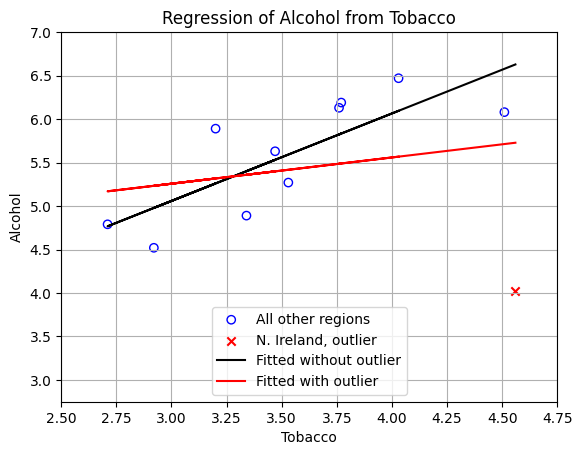

In [40]:
'''Let's compare the results of the two fits'''

plt.scatter( df.Tobacco[:-1], df.Alcohol[:-1],
         marker='o', facecolors='none', edgecolors='b',
         label='All other regions')
 
plt.scatter( df.Tobacco[-1:], df.Alcohol[-1:],
         marker='x', color='r',
         label='N. Ireland, outlier')
 
plt.plot( df.Tobacco, intercept + slope*df.Tobacco, 'k', label='Fitted without outlier' )
plt.plot( df.Tobacco, intercept_o + slope_o * df.Tobacco , 'r-', label='Fitted with outlier')
plt.xlabel('Tobacco') ; 
plt.axis([2.5,4.75,2.75,7.0])
plt.ylabel('Alcohol')
plt.title('Regression of Alcohol from Tobacco') ;
plt.grid() ;
plt.legend(loc='lower center')
plt.show()

# In this example, the influence of the outlier is rather significant. It appears that an outlier point has high influence on the slope of the line. Points like these are called influential points; we can say that these points "pull on the line" and are points with high leverage.

# Linear regression with scikit-learn

Scikit-learn (sklearn) is a Python machine learning library. In this section we will use Linear Regression from sklearn. Let us see how linear regression can be used.

In [49]:
import sklearn

'''We will also use numpy for calculations and Pandas for dataset manipulations'''

import numpy as np
import pandas as pd

# Ensure that plots are displayed inline within the notebook
%pylab inline 

'''%pylab inline: 
No need to import numpy as np. %pylab takes care of importing numpy as np 
No need to import matplotlib.pyplot as plt. %pylab inline takes care of importing matplotlib.pyplot as plt'''

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# DataFrame bike_shairing

In [48]:
'''Let's read data into Pandas dataframe'''
bike_sharing = pd.read_csv('module08/bikes_sharing.csv', header = 0, sep = ',')

bike_sharing.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Here is a brief description of the data fields:


| Field | Description |
| ---: | :--- |
| datetime | hourly date + timestamp |
| season |  `1` = spring, `2` = summer, `3` = fall, `4` = winter |
| holiday | whether the day is considered a holiday |
| workingday | whether the day is not a weekend / holiday |
| weather | `1` = Clear, Few clouds, Partly cloudy, Partly cloudy; `2` = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; `3` = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; `4` = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp | temperature in Celsius  | 
| atemp | "feels like" temperature in Celsius |
| humidity | relative humidity |
| windspeed | wind speed |
| casual | number of non-registered user rentals initiated |
| registered | number of registered user rentals initiated |
| count | number of total rentals |


In [51]:
'''Before proceeding with regression, first check 
if there are any missing values'''
bike_sharing.isnull().values.any()

False

In [52]:
'''And the size of dataframe'''
bike_sharing.shape # 10,886 observations (rows) and 12 columns.

(10886, 12)

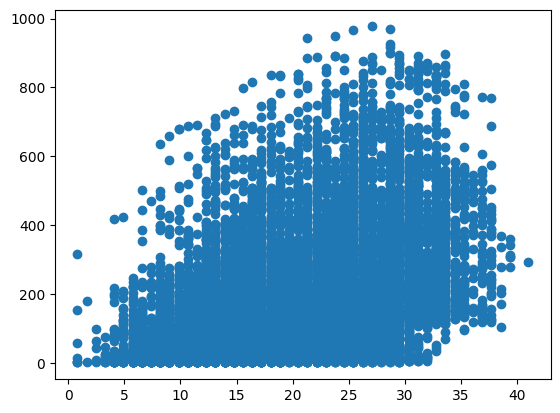

In [53]:
# Let's see if the number of total rentals depends on the air temperature.
plt.scatter(x=bike_sharing["temp"], y=bike_sharing["count"])

# This graph does show an upward trend, the number of rentals is increasing with temperature. But since data is collected every hour, it would be more informative to show data at a given hour of a day. Before that, we shall create two new columns month and hour.

In [ ]:
# Convert the 'datetime' column to datetime format. 

bike_sharing.datetime = bike_sharing.datetime.apply(pd.to_datetime)
# bike_sharing['datetime'] = bike_sharing['datetime'].apply(pd.to_datetime)

In [58]:
bike_sharing['month'] = bike_sharing.datetime.apply(lambda x : x.month)
bike_sharing['hour'] = bike_sharing.datetime.apply(lambda x: x.hour)
bike_sharing.head(5)

'''.apply(lambda x: x.month): 
This applies a lambda function to each element in the 'datetime' column. The lambda function lambda x: x.month extracts the month component from each datetime object x and assigns it to the corresponding row in the new 'month' column.'''

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


In [ ]:
bike_sharing.loc[bike_sharing['hour'] == 15]
bike_sharing[bike_sharing['hour'] == 15]

'''Both expressions achieve the same result, but the first one (bike_sharing.loc[bike_sharing['hour'] == 15]) uses .loc for explicit label-based indexing, while the second one (bike_sharing[bike_sharing['hour'] == 15]) uses boolean indexing directly on the DataFrame.'''

In [60]:
# Here we fetch only row with hour = 15
bike_sharing_15 = bike_sharing.loc[bike_sharing['hour'] == 15]
bike_sharing_15.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
15,2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110,1,15
38,2011-01-02 15:00:00,1,0,0,3,13.94,16.665,81,11.0014,19,55,74,1,15
60,2011-01-03 15:00:00,1,0,1,1,10.66,12.120,30,16.9979,14,58,72,1,15
83,2011-01-04 15:00:00,1,0,1,1,11.48,13.635,52,16.9979,17,48,65,1,15
106,2011-01-05 15:00:00,1,0,1,1,12.30,14.395,28,12.9980,7,55,62,1,15


In [61]:
bike_sharing_15.shape

(456, 14)

Text(0, 0.5, 'Count')

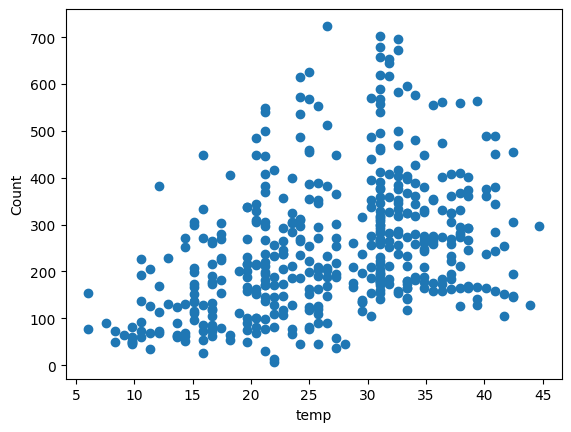

In [62]:
plt.scatter(x=bike_sharing_15["atemp"], y=bike_sharing_15["count"])
plt.xlabel("temp")
plt.ylabel('Count')

# Fit model

In [64]:
# scikit-learn needs the data organized as numpy vectors
Y = bike_sharing_15["count"]
X = bike_sharing_15["temp"].values.reshape(-1, 1)

# the model to do the fit
model = sklearn.linear_model.LinearRegression().fit(X, Y)
print(model.coef_)
print(model.intercept_)

'''LinearRegression(): This is a class within the linear_model submodule that represents a linear regression model.

.fit(X, Y): This is a method of the LinearRegression class that fits the linear regression model to the given data. It requires two parameters:

X: This represents the input features (independent variables) of the data. It should be a two-dimensional array-like object, such as a DataFrame or a numpy array, where each row corresponds to a sample and each column corresponds to a feature.
Y: This represents the target variable (dependent variable) of the data. It should be a one-dimensional array-like object, such as a Series or a numpy array, containing the observed target values.'''

[6.99568077]
91.42560375076252


In [66]:
b = bike_sharing_15['temp'].values.reshape(-1,1)

In [ ]:
'''The difference between using `(-1, 1)` and `(1, 1)` as arguments in the `reshape()` method lies in how numpy interprets the dimensions of the array being reshaped.

1. **`(-1, 1)`**:
   - When you use `-1` as an argument in `reshape()`, it acts as a placeholder that numpy will replace with a value such that the total number of elements in the reshaped array remains the same as the original array.
   - In this specific case, `(-1, 1)` indicates that you want to reshape the array into a two-dimensional array with one column, while numpy determines the appropriate number of rows based on the length of the original array.
   - This is particularly useful when you have a one-dimensional array and want to convert it into a two-dimensional array with a specific number of columns but let numpy determine the number of rows automatically.

2. **`(1, 1)`**:
   - When you use specific numbers like `1` and `1` in `reshape()`, you're explicitly instructing numpy to reshape the array into a two-dimensional array with one row and one column.
   - This means that regardless of the original size of the array, it will be reshaped into a two-dimensional array with one row and one column.
   - This form of reshaping is useful in cases where you want to convert a single value or a flattened array into a two-dimensional array with explicit dimensions.

In summary, the main difference lies in the flexibility provided by `(-1, 1)`, which allows numpy to automatically determine one dimension while you specify the other, compared to the fixed dimensions provided by `(1, 1)`, which explicitly defines both dimensions of the reshaped array.'''

In [68]:
'''Let's calculate predicted value of count,
using the result of our model with one variable X'''

lin_predicted_one = model.predict(X)

lin_predicted_one

array([217.62768479, 188.94539364, 165.99956073, 171.73601896,
       177.47247718, 171.73601896, 148.79018604, 148.79018604,
       154.52664427, 148.79018604, 137.31726958, 148.79018604,
       160.2631025 , 160.2631025 , 183.20893541, 165.99956073,
       148.79018604, 154.52664427, 206.15476833, 160.2631025 ,
       200.4183101 , 154.52664427, 171.73601896, 154.52664427,
       188.94539364, 200.4183101 , 154.52664427, 148.79018604,
       148.79018604, 183.20893541, 188.94539364, 206.15476833,
       252.04643416, 188.94539364, 223.36414302, 263.51935062,
       280.7287253 , 217.62768479, 188.94539364, 246.30997593,
       160.2631025 , 194.68185187, 223.36414302, 217.62768479,
       188.94539364, 194.68185187, 194.68185187, 217.62768479,
       188.94539364, 211.89122656, 229.10060124, 200.4183101 ,
       200.4183101 , 206.15476833, 240.5735177 , 286.46518353,
       234.83705947, 188.94539364, 188.94539364, 223.36414302,
       309.41101645, 206.15476833, 240.5735177 , 263.51

Text(0, 0.5, 'Count')

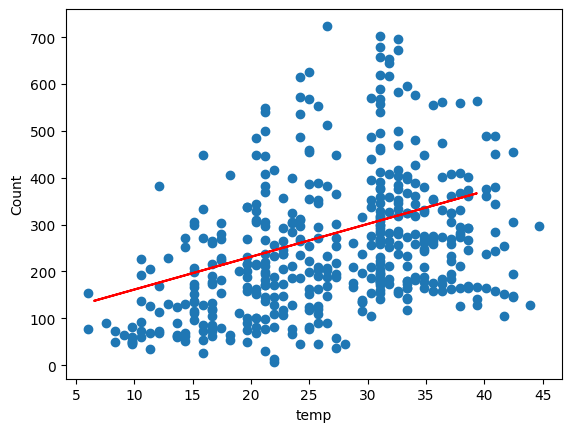

In [69]:
'''The graph below shows how well the model (line) fits the data'''
plt.scatter(x=bike_sharing_15["atemp"], y=bike_sharing_15["count"])
plt.plot(X, model.predict(X), 'r-')
plt.xlabel("temp")
plt.ylabel('Count')

In [70]:
'''As a mesure of "goodness" the Root Mean Square Error is calculated.
The actual data (Y column) and predicted values are compared.'''

from sklearn.metrics import mean_squared_error, r2_score

lin_one_mse= mean_squared_error(Y, lin_predicted_one)
lin_one_rmse = np.sqrt(lin_one_mse)

print(lin_one_mse)
print(lin_one_rmse)

17706.854522748654
133.06710533692635


# Fitting multiple variables

In [ ]:
X_temp_hum = bike_sharing_15[["temp", "humidity"]].values.reshape(-1,2)

In [72]:
'''This is an example of multi-variable fit, in this case 2 variables: temp and humidity'''
'''scikit-learn needs the data organized as numpy vectors'''

Y = bike_sharing_15["count"]
X_temp_hum = bike_sharing_15[["temp", "humidity"]]
model_two_variables = sklearn.linear_model.LinearRegression().fit(X_temp_hum, Y)
print(model_two_variables.coef_)
print(model_two_variables.intercept_)

[ 6.69169846 -1.26172547]
159.16255100187547


In [73]:
'''Note that the intercept and temp coefficient changed when another variable was added'''

lin_predicted_two = model_two_variables.predict(X_temp_hum)

lin_two_mse= mean_squared_error(Y, lin_predicted_two)
lin_two_rmse = np.sqrt(lin_two_mse)
print(lin_two_rmse)

131.11213598724154
